**TO - DO TASKS**

In [1]:
import pandas as pd
import numpy as np

**Problem 1 - Data Read, Write and Inspect:
Complete all following Task :**

• Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [2]:
# Load dataset
df_bank = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Datasets/bank .csv")

# Info of DataFrame
print(df_bank.info(), "\n")

# (a) Columns with dtype=object
object_columns = df_bank.select_dtypes(include='object').columns
print("Object Columns:", object_columns, "\n")

# (b) Unique values of object columns
for col in object_columns:
    print(f"Unique values in {col}:", df_bank[col].unique(), "\n")

# (c) Null values in each column
print("Null values in each column:\n", df_bank.isnull().sum(), "\n")

# Drop object columns and save as new DataFrame
df_numeric = df_bank.drop(columns=object_columns)
df_numeric.to_csv("banknumericdata.csv", index=False)

# Load and show summary statistics
df_numeric_loaded = pd.read_csv("banknumericdata.csv")
print("Summary statistics:\n", df_numeric_loaded.describe(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None 

Object Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact

**Complete all the following Task:**
• Dataset for the Task: "medical_student.csv"

1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify column with missing (null) values.

3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [3]:
# Load dataset
df_medical = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Datasets/medical_students_dataset.csv")

# Info and null values
print(df_medical.info())
print("Null values:\n", df_medical.isnull().sum(), "\n")

# Fill missing values
df_filled = df_medical.copy()
for col in df_filled.columns:
    if df_filled[col].isnull().sum() > 0:
        if df_filled[col].dtype in ['float64', 'int64']:
            df_filled[col].fillna(df_filled[col].mean(), inplace=True)  # Numerical: mean
        else:
            df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)  # Categorical: mode

# Check and remove duplicates
print("Number of duplicate rows:", df_filled.duplicated().sum(),  "\n")
df_filled.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Null values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood T

<ipython-input-3-872f8e627d30>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].mean(), inplace=True)  # Numerical: mean
<ipython-input-3-872f8e627d30>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

Number of duplicate rows: 12572 



Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?



In [4]:
# Load dataset
df_titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Datasets/Titanic-Dataset.csv")

# Subset and filter for first-class passengers
subset = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class = subset[subset['Pclass'] == 1]

# Statistics for Fare
print("Fare statistics:")
print("Mean:", first_class['Fare'].mean())
print("Median:", first_class['Fare'].median())
print("Max:", first_class['Fare'].max())
print("Min:", first_class['Fare'].min())

Fare statistics:
Mean: 84.1546875
Median: 60.287499999999994
Max: 512.3292
Min: 0.0


Problem - 2:

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.



In [5]:

# Null values in Age and drop rows
print("Null values in Age:", first_class['Age'].isnull().sum())
first_class = first_class.dropna(subset=['Age'])


Null values in Age: 30


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:


• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

2. Add these new columns to the original DataFrame.

3. Drop the original ’Embarked’ column.

4. Print the first few rows of the modified DataFrame to verify the changes.


In [6]:

# One-hot encoding for Embarked
df_titanic_encoded = pd.get_dummies(df_titanic, columns=['Embarked'], prefix='Embarked')

# Compare survival rates by gender
gender_survival = df_titanic.groupby('Sex')['Survived'].mean()
print("Survival rates by gender:\n", gender_survival)

Survival rates by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Problem - 4:


Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

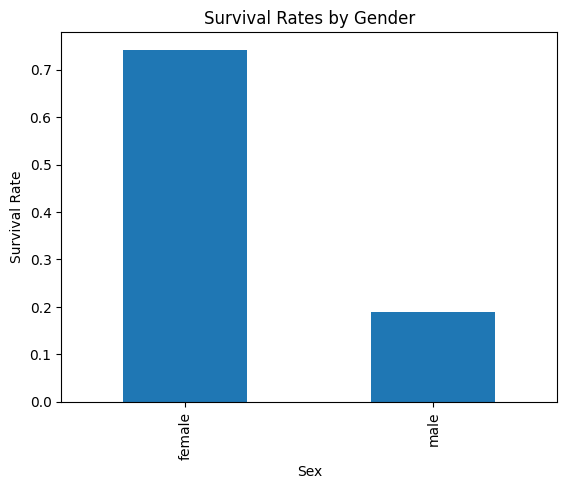

Survival rates by port:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [7]:

# Plot survival rates by gender
import matplotlib.pyplot as plt
gender_survival.plot(kind='bar', title='Survival Rates by Gender', ylabel='Survival Rate')
plt.show()

# Compare survival rates by port
port_survival = df_titanic.groupby('Embarked')['Survived'].mean()
print("Survival rates by port:\n", port_survival)

Problem - 5:


Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

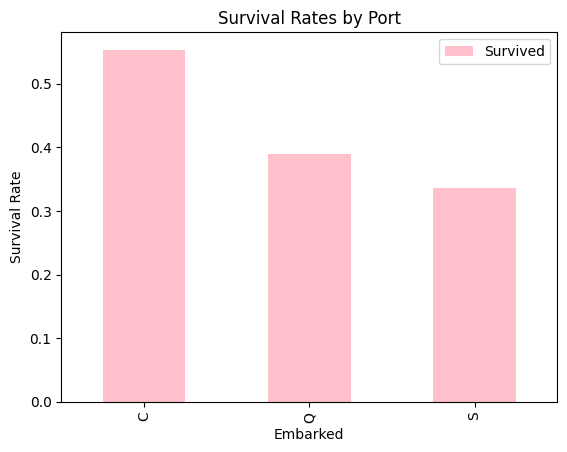

In [8]:
# Plot survival rates by port
port_survival.plot(kind='bar', title='Survival Rates by Port', ylabel='Survival Rate', color='pink')
plt.legend()
plt.show()